In [1]:
%cd ..

/app


In [2]:
import pandas as pd
import numpy as np
from numpy.random import default_rng
import matplotlib.pyplot as plt 
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import seaborn as sns

In [100]:
def normalize_ranked_ratings(df):
    dict_norm = {}
    for col in df:
        col_min = min(df[col])
        col_max = max(df[col])
        norm = []
        for item in df[col]:
            val = (item - col_min) / (col_max - col_min)
            norm.append(val)
        dict_norm[col] = norm
    return pd.DataFrame(dict_norm, columns=df.columns, index=df.index)

def merge_ML_ratings(df_ml, df_other, rater_label):
    df_ml_other = pd.merge(df_ml, df_other, on='File')
    df_ml_other.rename(columns={0:rater_label}, inplace=True)
    df_ml_other.dropna(inplace=True)
    return df_ml_other
    

In [4]:
SURVEY_A = 'data/ratings/rating_survey_A.csv'
SURVEY_B = 'data/ratings/rating_survey_B.csv'
ML_RATING = 'data/ratings/ml_rating.csv'
RAW_RATERS = 'data/ratings/rating_survey_all.csv'

df_raw_raters = pd.read_csv(RAW_RATERS)
df_A = pd.read_csv(SURVEY_A)
df_B = pd.read_csv(SURVEY_B)

In [5]:
rater_ids_A = []
rater_ids_B = []
for i in range(1, 11):
    rater_ids_A.append(f'A{i}')
    rater_ids_B.append(f'B{i}')


array([[<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>]], dtype=object)

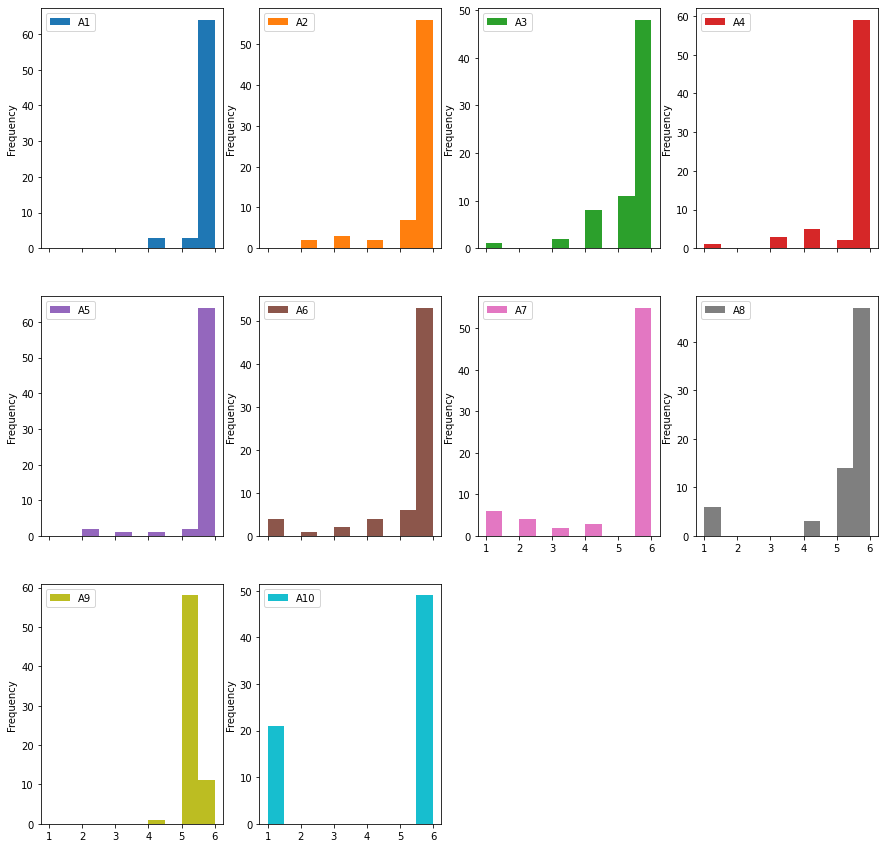

In [6]:
ratings_A = df_A[df_A.columns.intersection(rater_ids_A)]
ratings_A.plot(subplots=True, layout=(3,-1), kind='hist', figsize=(15,15), sharex=True)
# fig, axs = plt.subplots(2,5) # plots
# counter = 1
# for i in range(2):
#     for j in range(5):       
#         axs[i, j].hist(df_A[f'A{counter}'])
#         axs[i, j].set_title(f'Rater: A{counter}')
#         counter += 1

array([[<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>]], dtype=object)

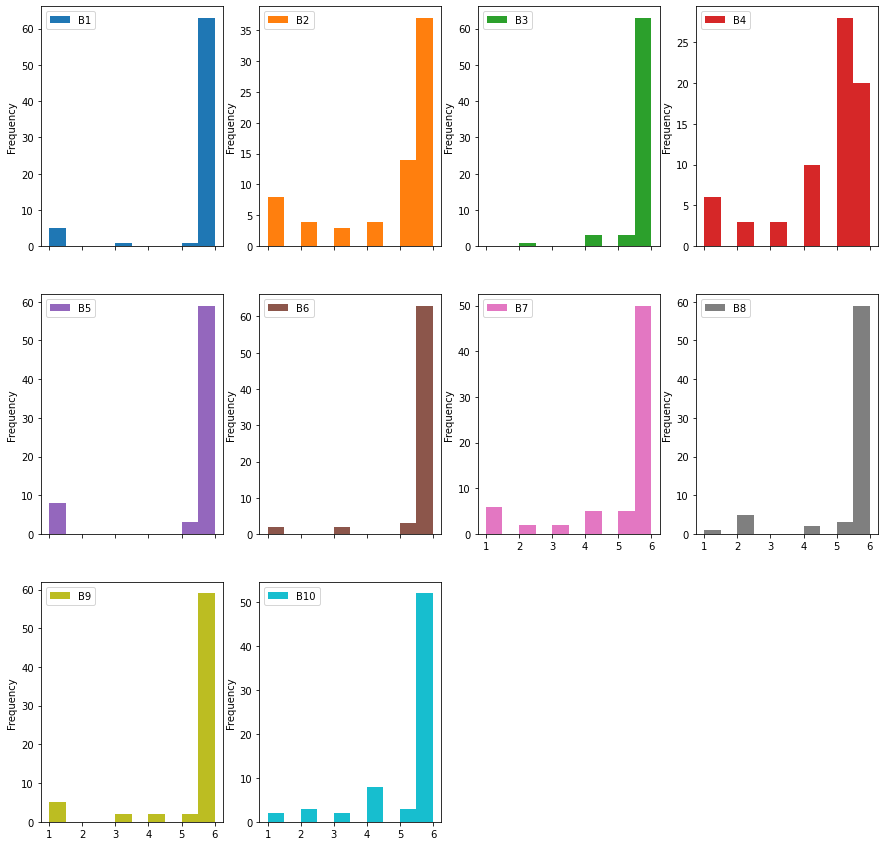

In [7]:
ratings_B = df_B[df_B.columns.intersection(rater_ids_B)]
ratings_B.plot(subplots=True, layout=(3,-1), kind='hist', figsize=(15,15), sharex=True)

# Ranked

In [8]:
SURVEY_RANKED = 'data/ratings/ratings_ranked.csv'
df_ranked = pd.read_csv(SURVEY_RANKED)
df_ranked

,Row Labels,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,B1,B2,B3,B4,B5,B6,B7,B8,B9,B10
0,ba1_HV1_ex8_R2,3,5,5,5,5,6,5,4,3,...,4,5,4,6,3,4,6,5,5,6
1,ba1_LV3_ex8_R4,3,5,5,5,5,6,5,3,3,...,3,6,4,6,3,4,5,5,5,6
2,ba1_LV6_ex8_R1,3,5,5,5,5,6,5,4,2,...,4,5,4,5,3,4,6,5,5,6
3,ba1_MV3,3,5,5,5,5,6,5,4,2,...,4,6,4,6,3,4,6,5,5,6
4,bao3_FV3,3,5,4,3,5,6,5,3,2,...,4,3,4,4,3,4,6,5,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,ya1_LV3_ex12_R2,2,4,5,5,5,6,5,4,2,...,4,3,4,3,2,4,6,5,4,4
66,ya1_MV2,3,5,5,5,5,6,5,4,2,...,4,6,4,5,3,4,6,5,5,6
67,yang4_LV4_ex19_R2,3,3,4,5,5,6,5,4,2,...,4,5,4,5,3,4,6,5,2,4
68,yang4_LV5_ex19_R7,3,5,5,5,5,6,5,4,3,...,4,6,4,5,3,4,5,5,5,4


array([[<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>]], dtype=object)

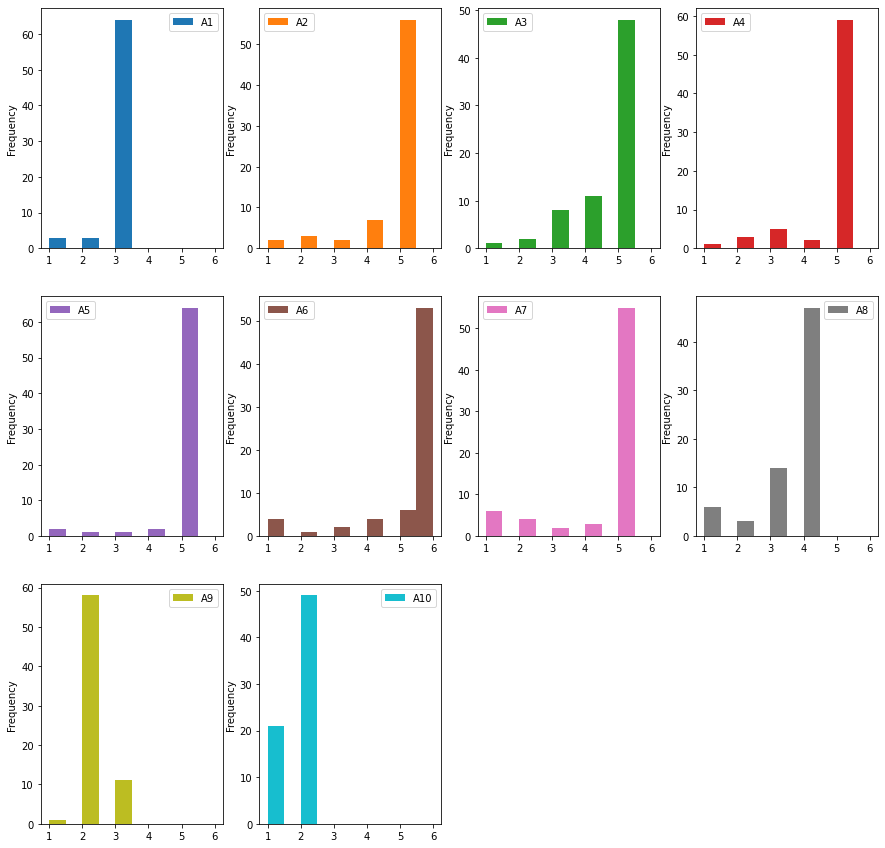

In [9]:
ratings_A_ranked = df_ranked[df_ranked.columns.intersection(rater_ids_A)]
ratings_A_ranked.plot(subplots=True, layout=(3,-1), kind='hist', figsize=(15,15), sharex=False)

array([[<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>]], dtype=object)

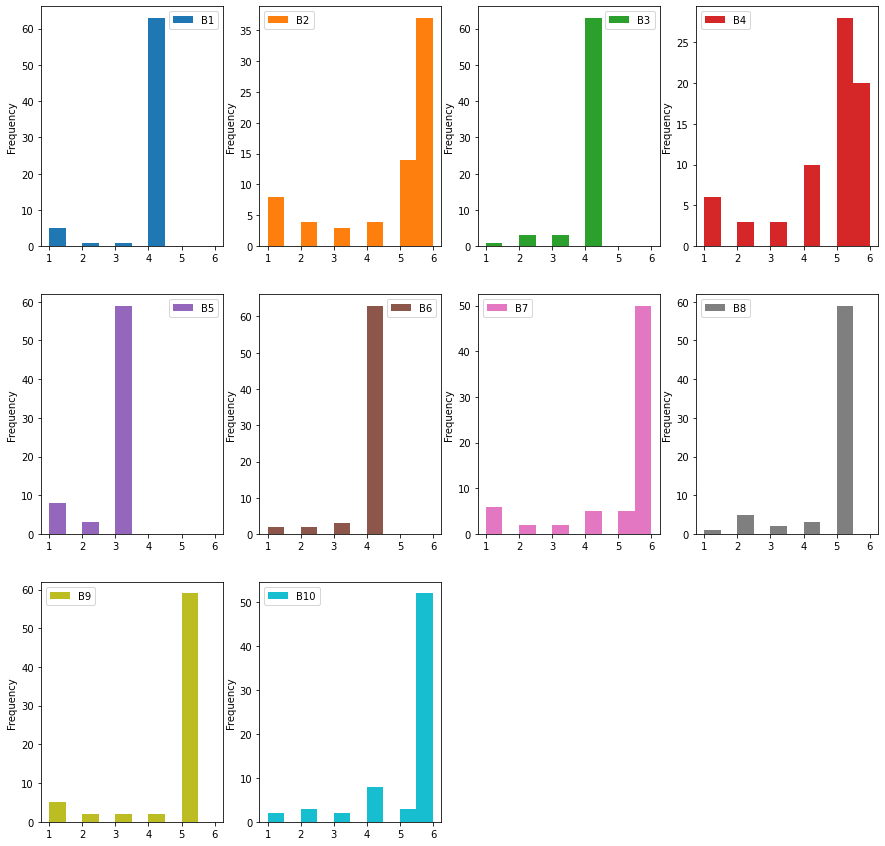

In [10]:
ratings_B_ranked = df_ranked[df_ranked.columns.intersection(rater_ids_B)]
ratings_B_ranked.plot(subplots=True, layout=(3,-1), kind='hist', figsize=(15,15), sharex=False)

In [71]:
# normalize onto 0-1
dict_norm = {'File': df_ranked.iloc[:, 0]}
for col in df_ranked.iloc[: , 1:]:
    col_min = min(df_ranked[col])
    col_max = max(df_ranked[col])
    norm = []
    for item in df_ranked[col]:
        val = (item - col_min) / (col_max - col_min)
        norm.append(val)
    dict_norm[col] = norm
df_norm = pd.DataFrame(dict_norm)
df_norm.index = df_norm['File']
# df_norm.rename(columns={'Word':'Word_drop'}, inplace=True)
df_norm.drop(columns=['File'], inplace=True)
df_norm

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,B1,B2,B3,B4,B5,B6,B7,B8,B9,B10
File,,,,,,,,,,,,,,,,,,,,
ba1_HV1_ex8_R2,1.0,1.00,1.00,1.0,1.0,1.0,1.0,1.000000,1.0,0.0,1.000000,0.8,1.0,1.0,1.0,1.0,1.0,1.0,1.00,1.0
ba1_LV3_ex8_R4,1.0,1.00,1.00,1.0,1.0,1.0,1.0,0.666667,1.0,1.0,0.666667,1.0,1.0,1.0,1.0,1.0,0.8,1.0,1.00,1.0
ba1_LV6_ex8_R1,1.0,1.00,1.00,1.0,1.0,1.0,1.0,1.000000,0.5,0.0,1.000000,0.8,1.0,0.8,1.0,1.0,1.0,1.0,1.00,1.0
ba1_MV3,1.0,1.00,1.00,1.0,1.0,1.0,1.0,1.000000,0.5,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00,1.0
bao3_FV3,1.0,1.00,0.75,0.5,1.0,1.0,1.0,0.666667,0.5,0.0,1.000000,0.4,1.0,0.6,1.0,1.0,1.0,1.0,1.00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ya1_LV3_ex12_R2,0.5,0.75,1.00,1.0,1.0,1.0,1.0,1.000000,0.5,0.0,1.000000,0.4,1.0,0.4,0.5,1.0,1.0,1.0,0.75,0.6
ya1_MV2,1.0,1.00,1.00,1.0,1.0,1.0,1.0,1.000000,0.5,1.0,1.000000,1.0,1.0,0.8,1.0,1.0,1.0,1.0,1.00,1.0
yang4_LV4_ex19_R2,1.0,0.50,0.75,1.0,1.0,1.0,1.0,1.000000,0.5,0.0,1.000000,0.8,1.0,0.8,1.0,1.0,1.0,1.0,0.25,0.6


<AxesSubplot:xlabel='File'>

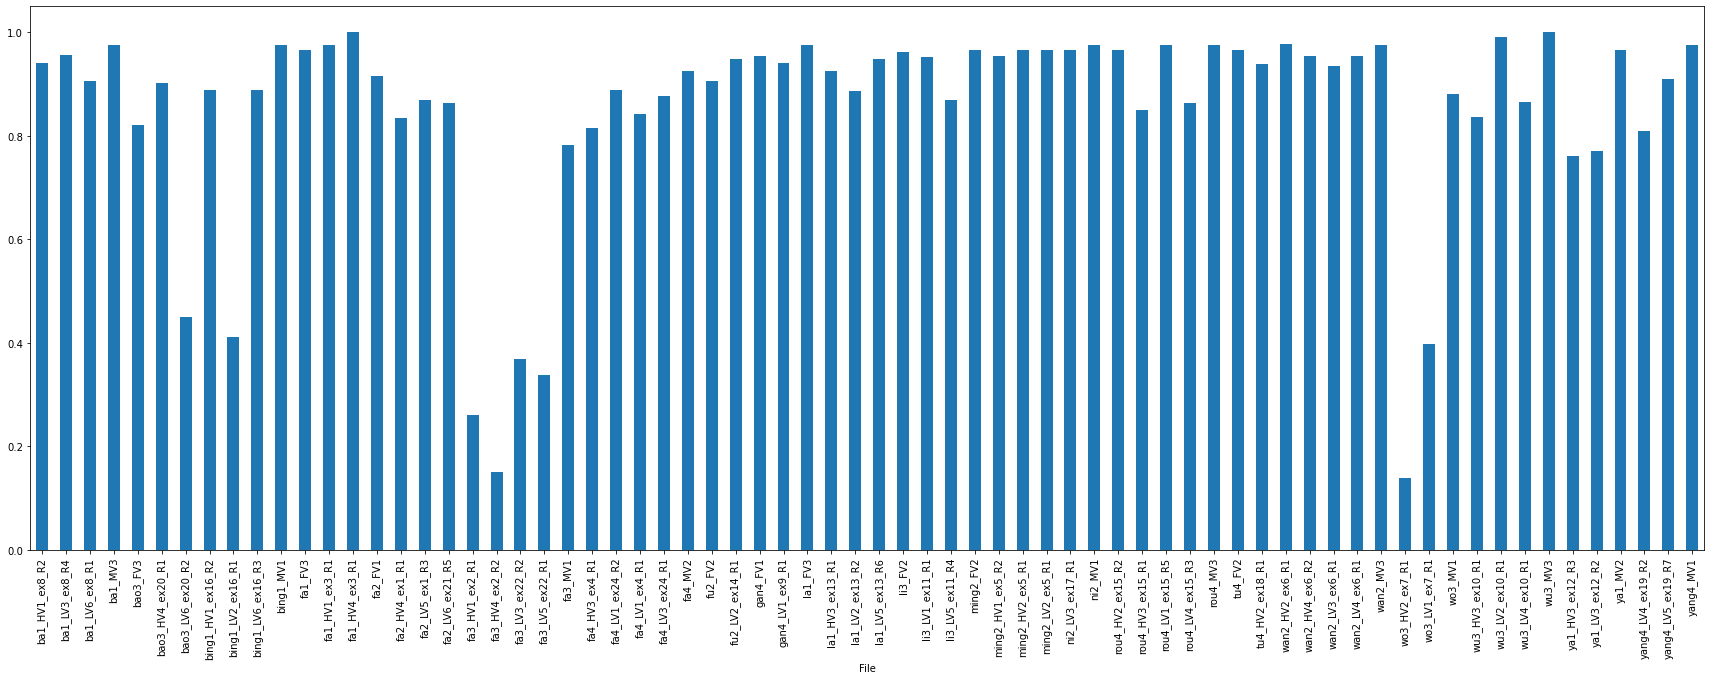

In [12]:
# mean rating for word
df_norm.mean(axis=1).plot(kind='bar', figsize=(30,10))

<AxesSubplot:>

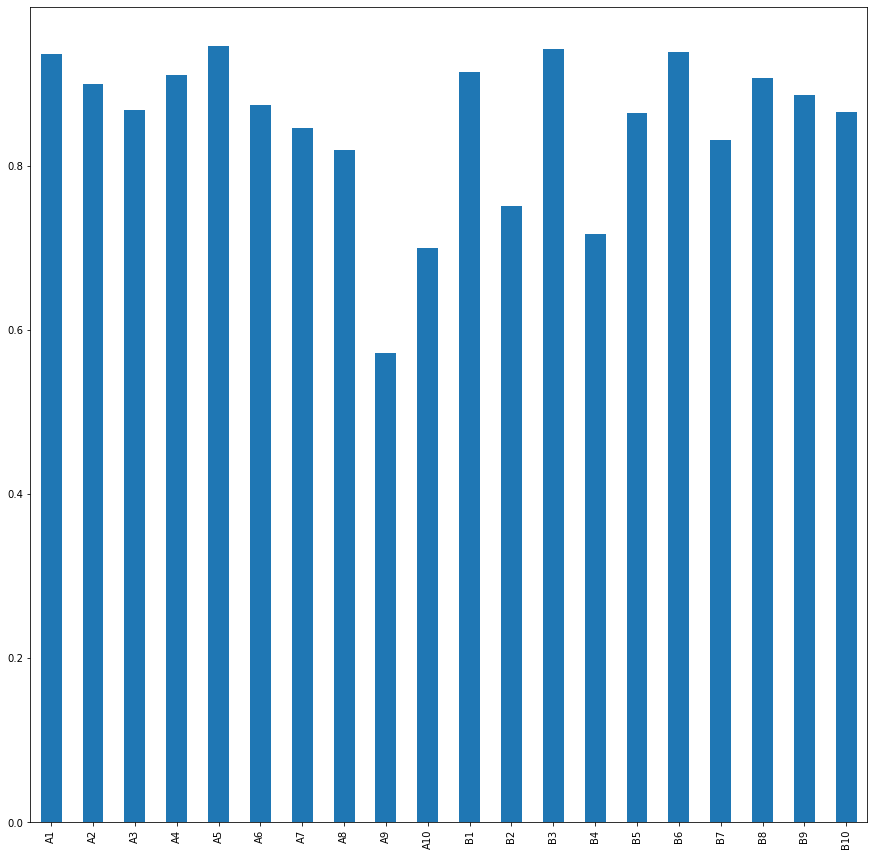

In [13]:
# rater mean
df_norm.mean(axis=0).plot(kind='bar', figsize=(15,15))

array([[<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>]], dtype=object)

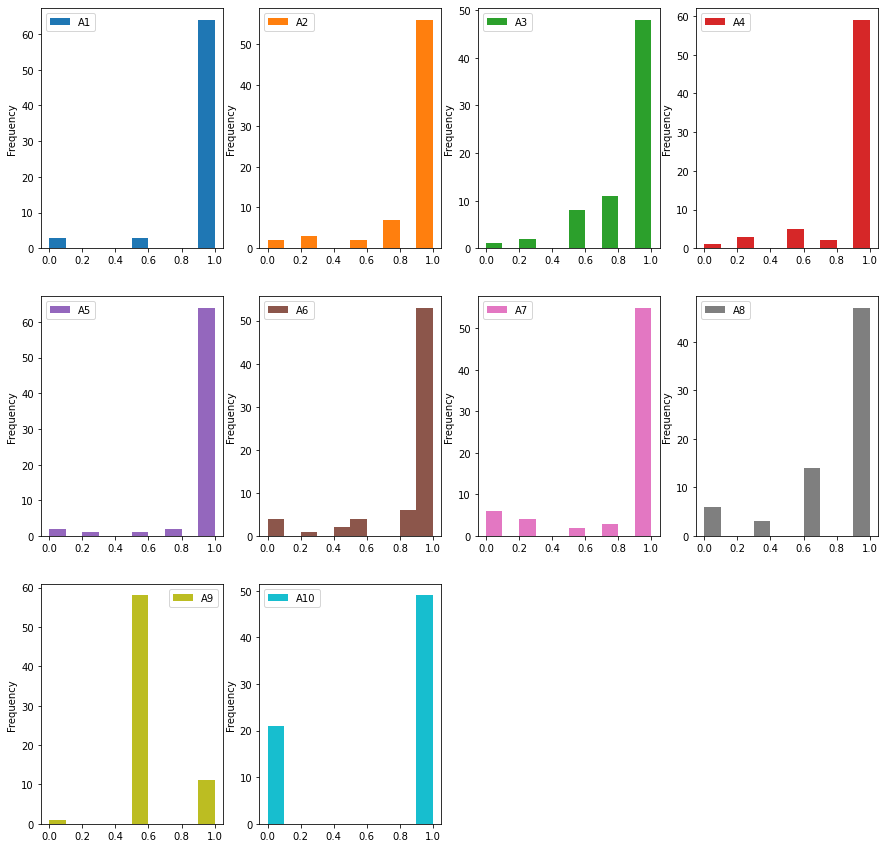

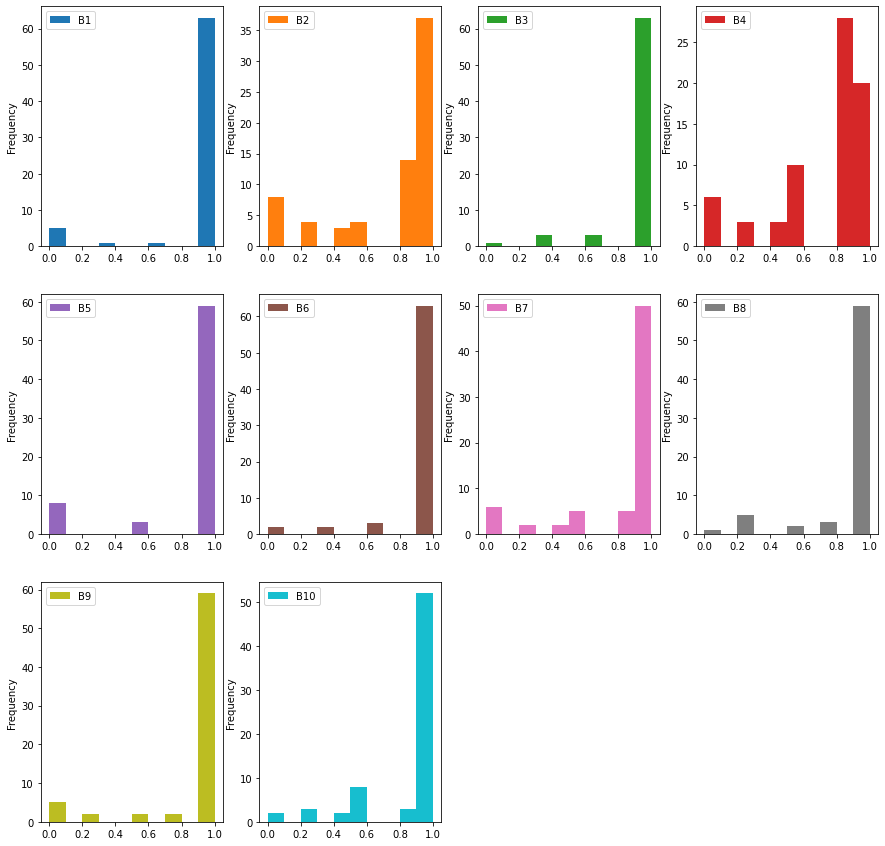

In [14]:
ratings_A_norm = df_norm[df_norm.columns.intersection(rater_ids_A)]
ratings_A_norm.plot(subplots=True, layout=(3,-1), kind='hist', figsize=(15,15), sharex=False)
ratings_B_norm = df_norm[df_norm.columns.intersection(rater_ids_B)]
ratings_B_norm.plot(subplots=True, layout=(3,-1), kind='hist', figsize=(15,15), sharex=False)

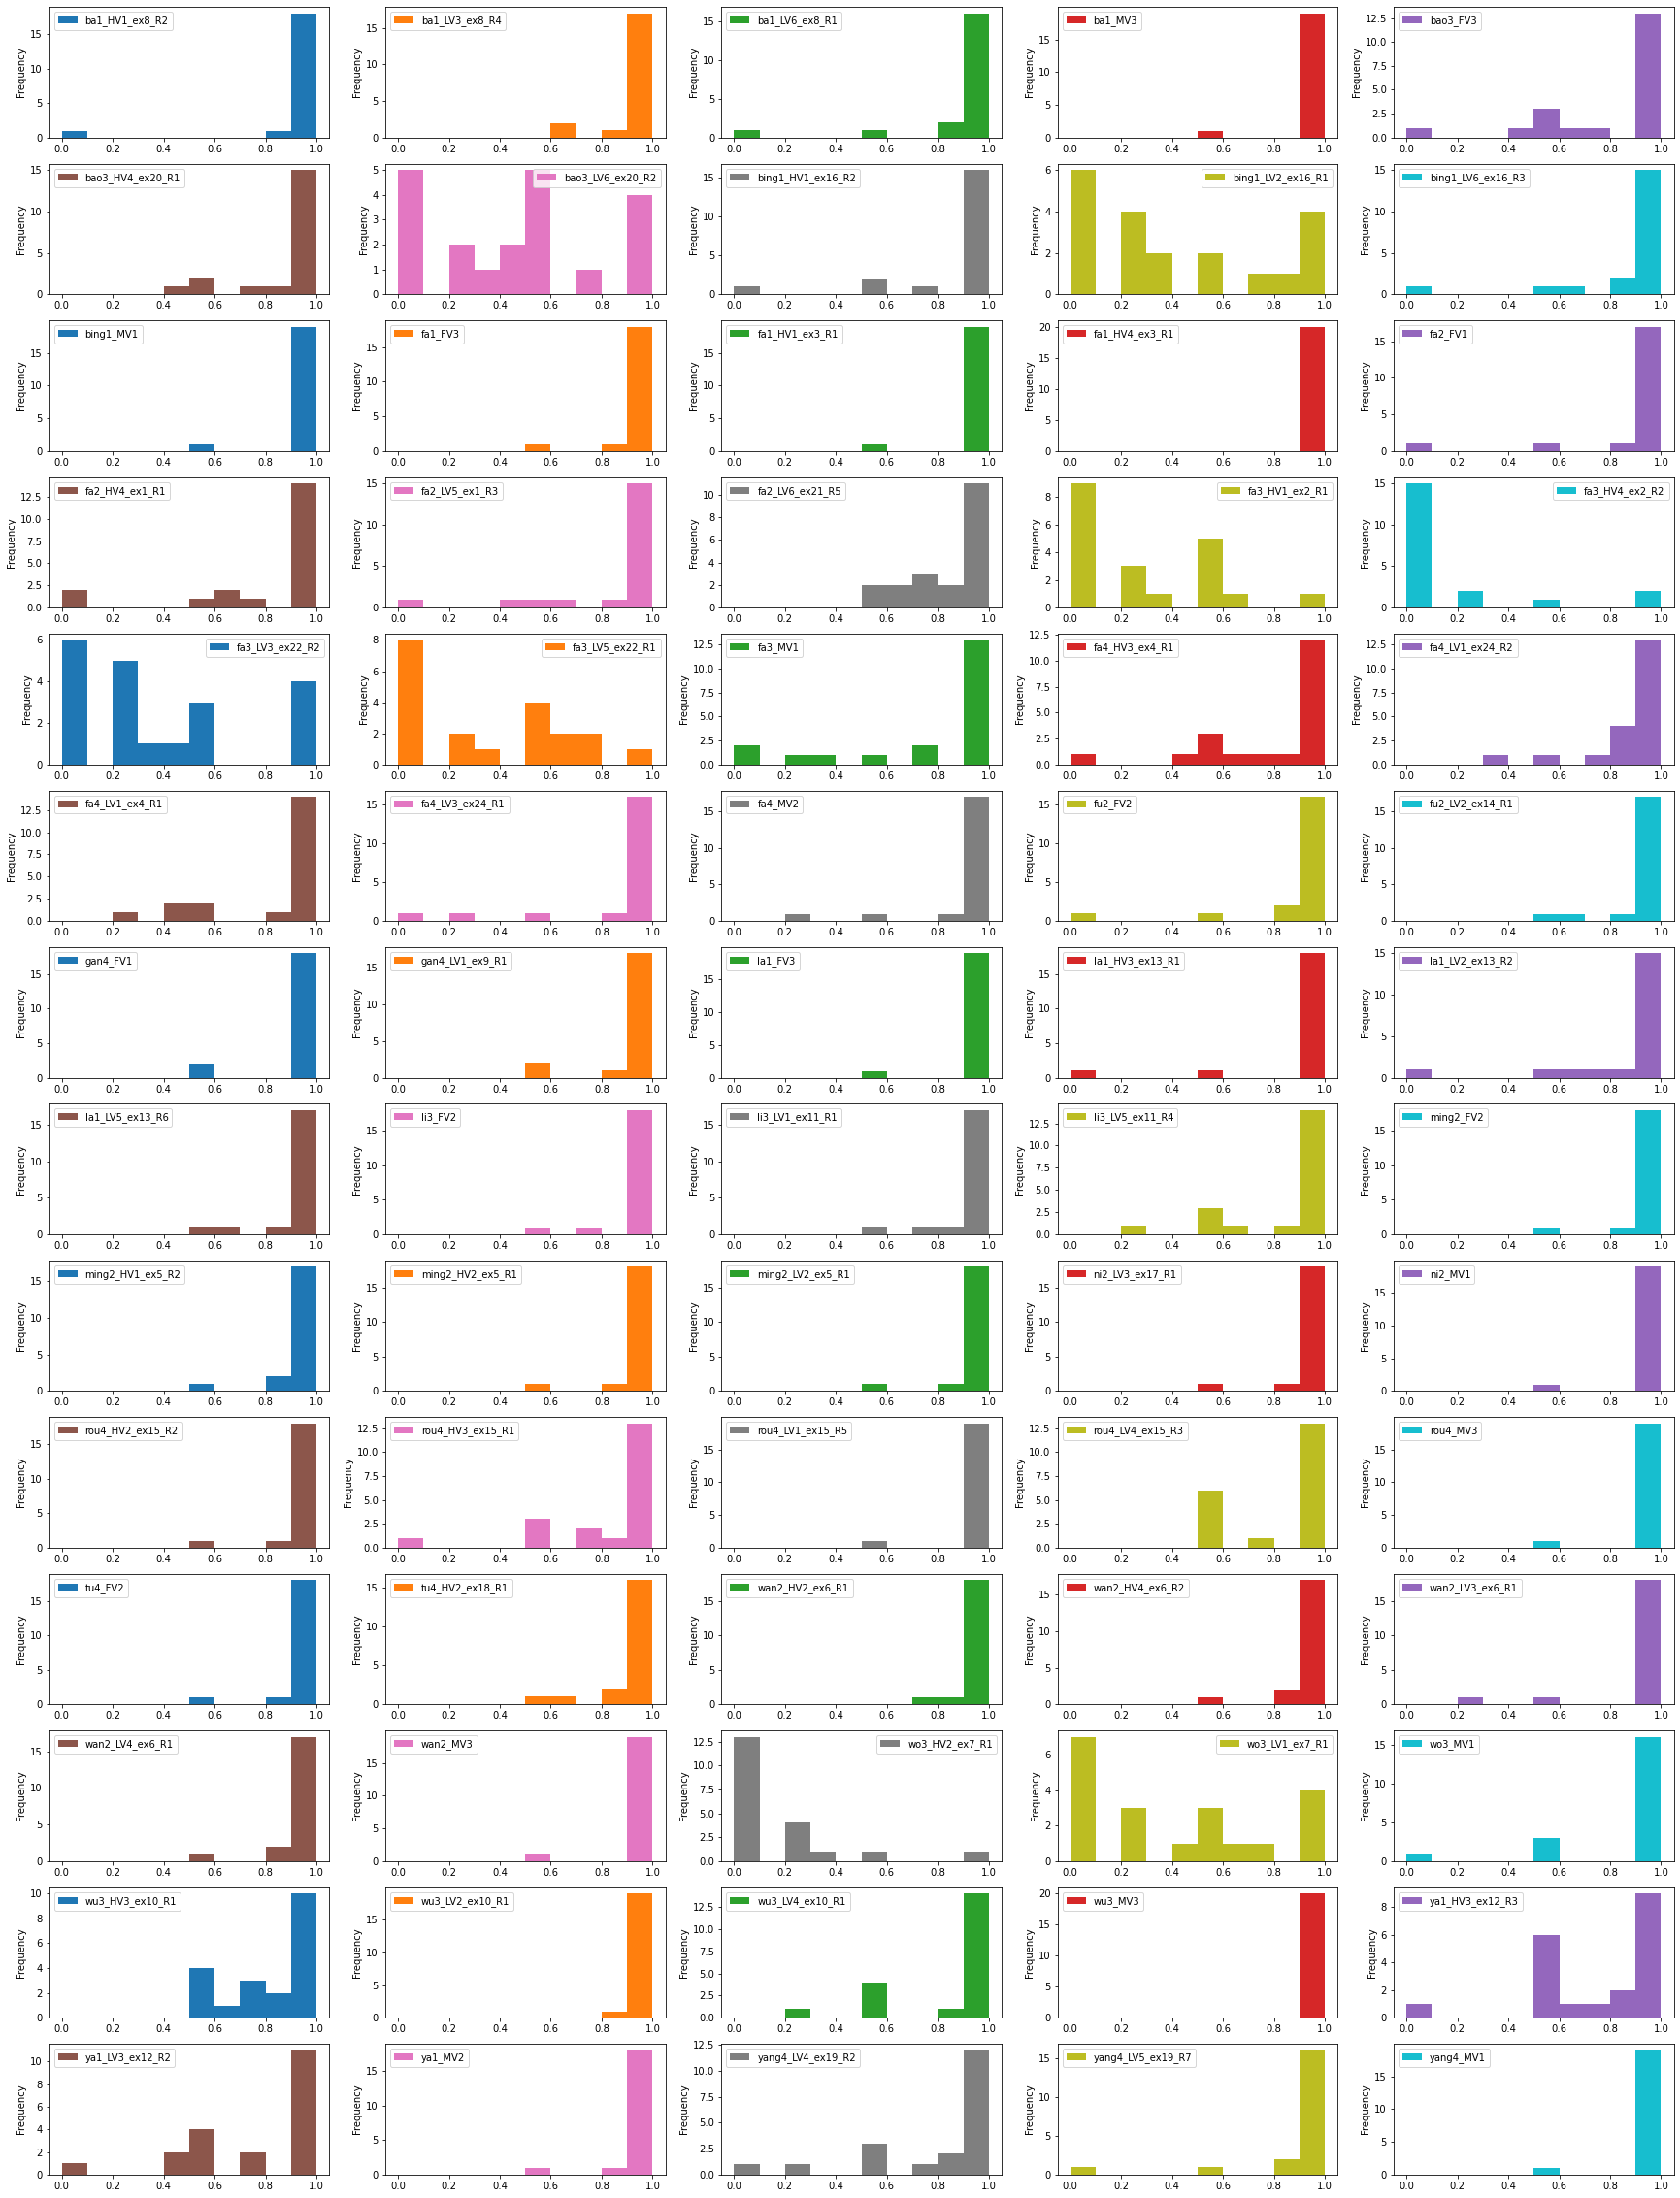

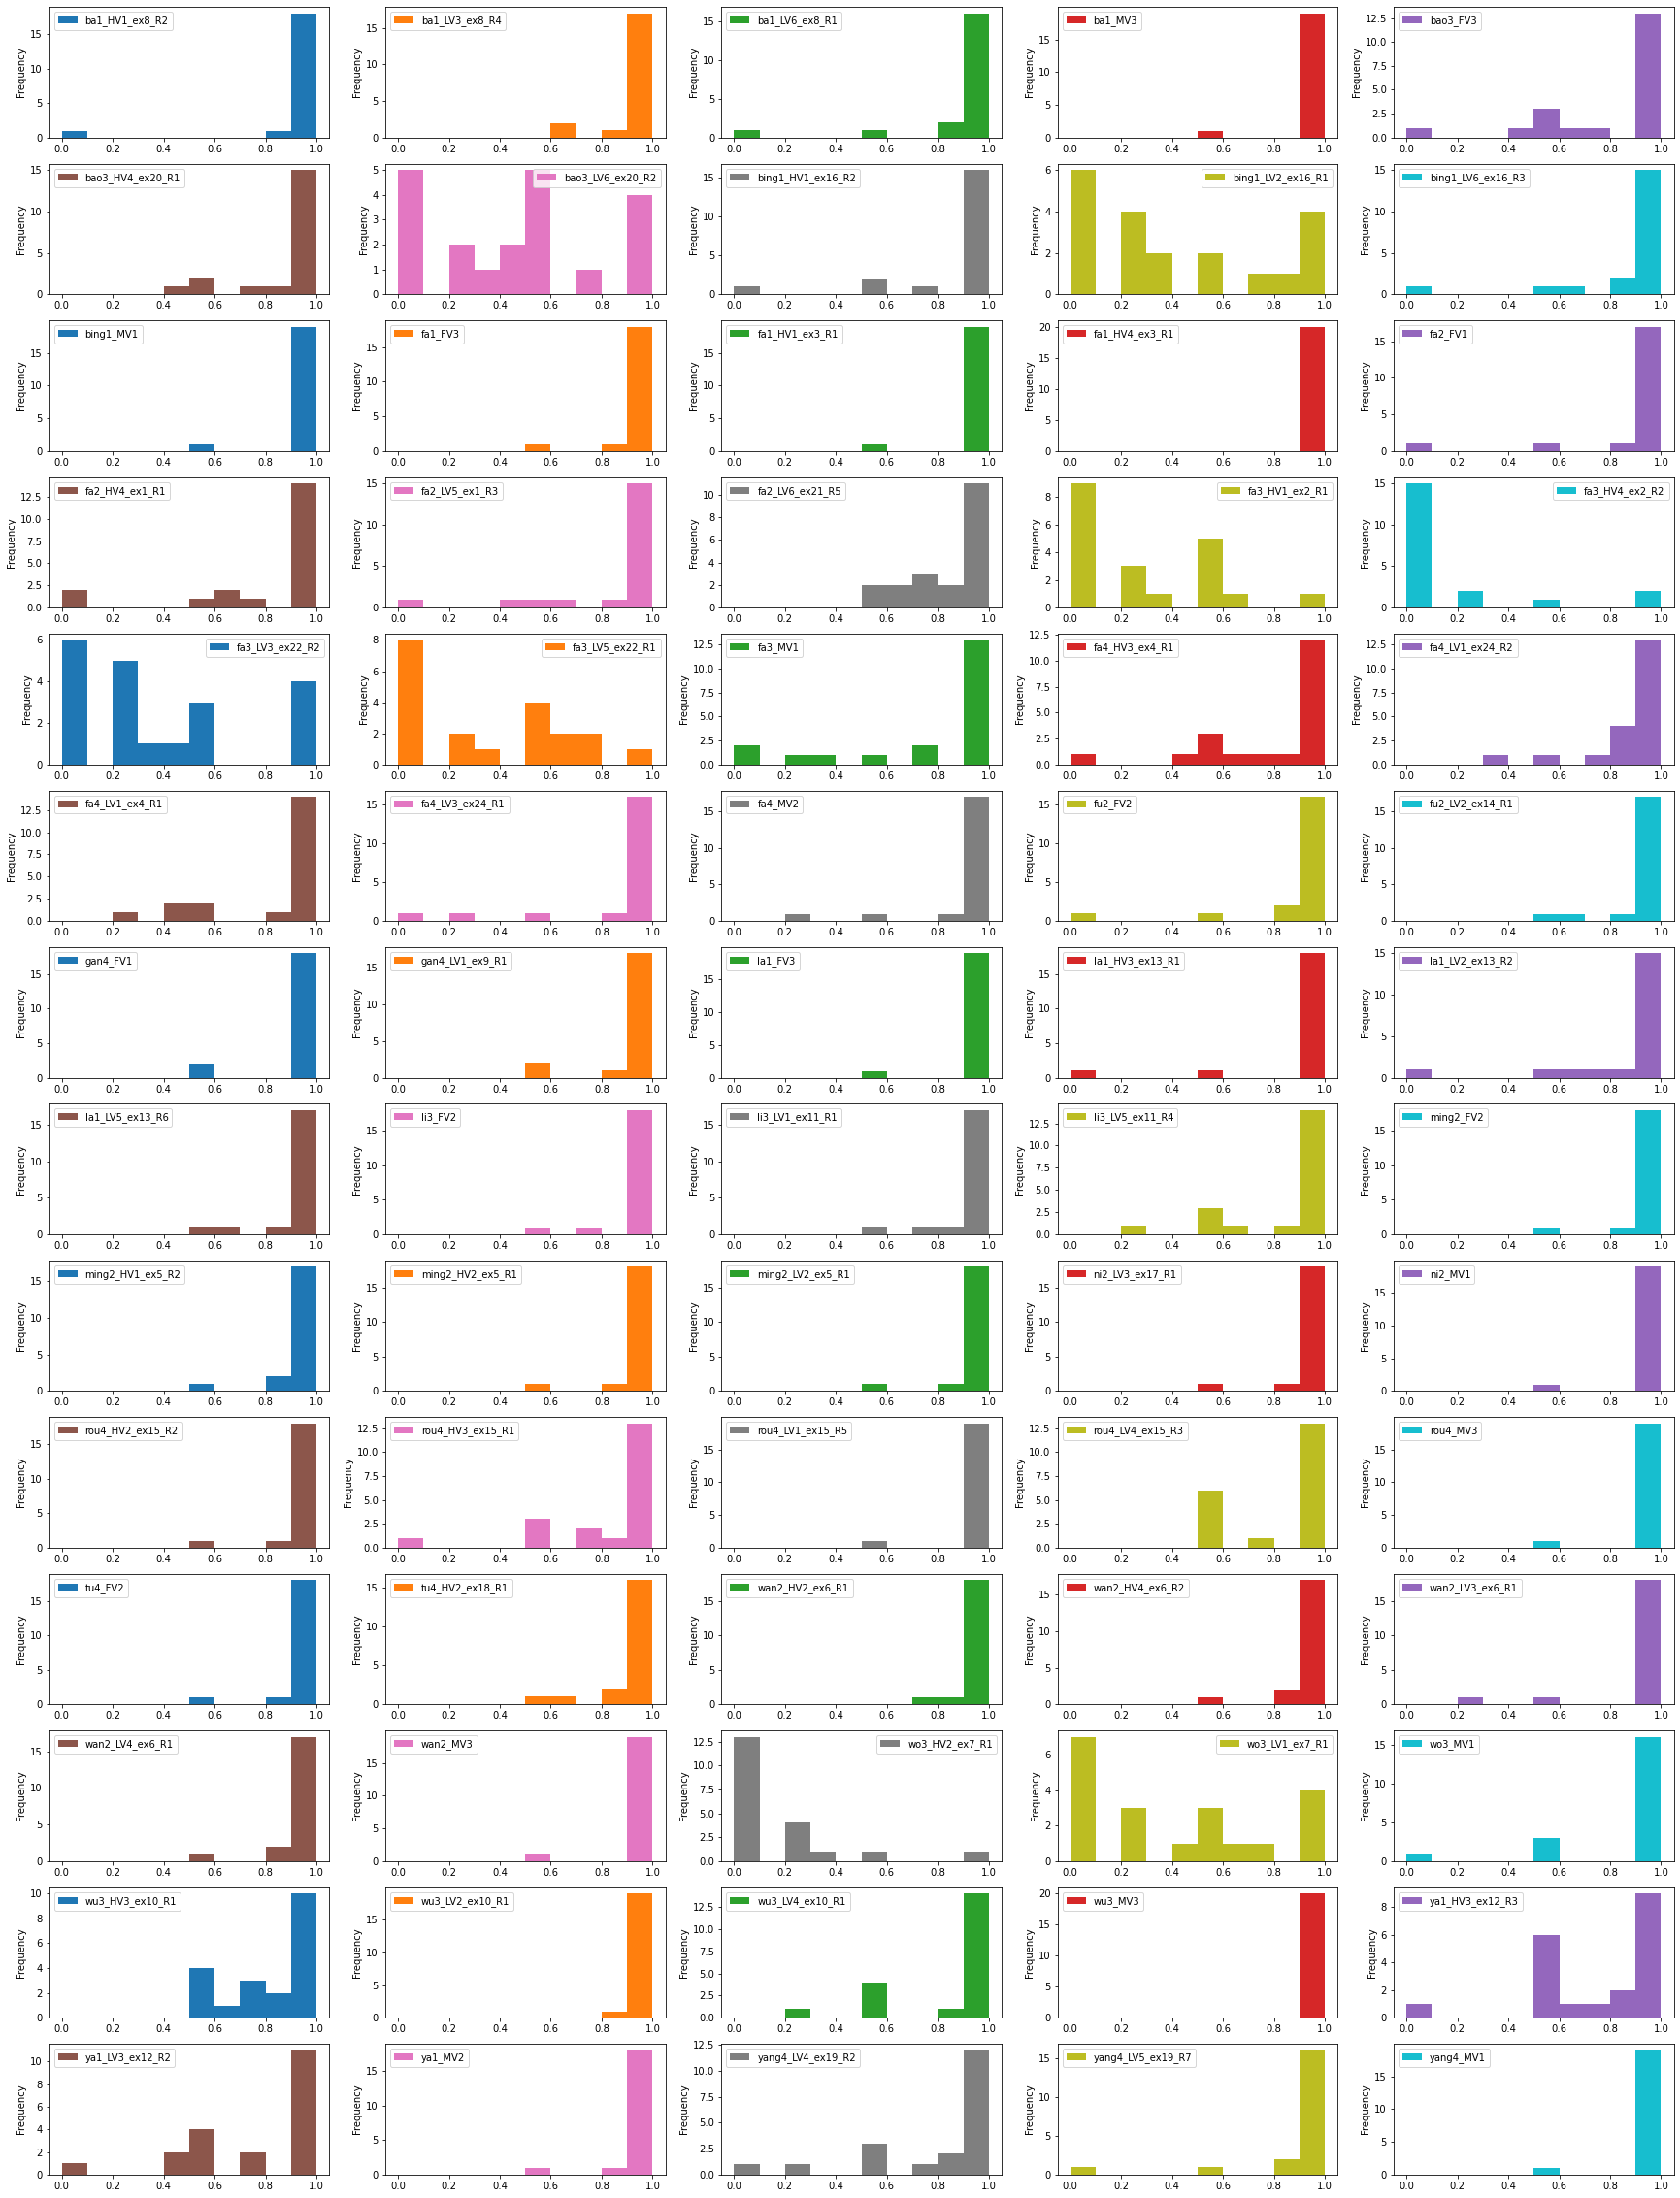

In [15]:
df_norm.T.plot(subplots=True, layout=(17,-1), kind='hist', figsize=(30, 50), sharex=False)
word_norm_fig = df_norm.T.plot(subplots=True, layout=(17,-1), kind='hist', figsize=(30, 50), sharex=False)
# can't export subplot graph????

# Compare Human and ML ratings

In [16]:
df_ml = pd.read_csv(ML_RATING)
df_ml.index = df_ml['File']
df_ml.drop(columns=['word key', 'File', 'Rating\nFeedback', 'ML Rating', 'Comments'], inplace=True)
df_ml_human = pd.merge(df_ml, df_norm.mean(axis=1).to_frame(), on='File')
df_ml_human.rename(columns={0:'Human'}, inplace=True)
df_ml_human.dropna(inplace=True)

In [17]:
diffs = []
preds = []
for index, row in df_ml_human.iterrows():
    tone = row['Target Tone']
    # obs - predicted
    diff = row['Human'] - row[f'Tone{int(tone)}']
    diffs.append(diff)
    preds.append(row[f'Tone{int(tone)}'])
df_ml_human['Prediction'] = preds
df_ml_human['Diff'] = diffs

In [18]:
df_ml_human

,Target Tone,Tone1,Tone2,Tone3,Tone4,Human,Prediction,Diff
File,,,,,,,,
ba1_MV3,1,0.869965,0.007545,0.097422,0.025067,0.975000,0.869965,0.105035
bao3_FV3,3,0.003309,0.000753,0.933619,0.062318,0.820833,0.933619,-0.112786
bing1_MV1,1,0.001149,0.000136,0.061872,0.936843,0.975000,0.001149,0.973851
fa1_FV3,1,0.957373,0.001463,0.003017,0.038148,0.965000,0.957373,0.007627
fa2_FV1,2,0.000044,0.895181,0.104629,0.000146,0.915000,0.895181,0.019819
...,...,...,...,...,...,...,...,...
wu3_LV2_ex10_R1,3,0.000249,0.152508,0.846639,0.000604,0.990000,0.846639,0.143361
wu3_LV4_ex10_R1,3,0.136202,0.006734,0.226991,0.630074,0.865000,0.226991,0.638009
ya1_HV3_ex12_R3,1,0.051486,0.149212,0.783298,0.016004,0.760833,0.051486,0.709348


In [19]:
# MSE
print('MSE:', mean_squared_error(df_ml_human['Human'], df_ml_human['Prediction']))
# https://statisticsbyjim.com/regression/mean-squared-error-mse/#:~:text=To%20find%20the%20MSE%2C%20take,by%20the%20number%20of%20observations.
# https://stackoverflow.com/questions/55743481/regression-problem-how-to-solve-the-problem-of-highly-decimal-input-features
# MSE gives too little weight to small differences in value < 1, while it exaggerates the weight for bigger differences in value > 1 because of the square function applied.
print('RMSE:', mean_squared_error(df_ml_human['Human'], df_ml_human['Prediction'], squared=False))

MSE: 0.19350203774438854
RMSE: 0.43988866516925457


# Bottom Baseline


Absolute worst we could do
Average Spearman Correlation: -0.0031964522642244577


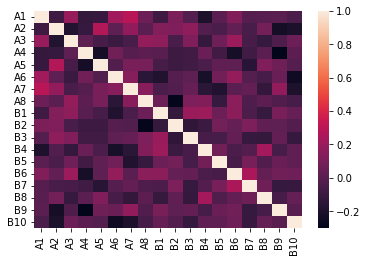

In [20]:
def sum_triu(arr):
    triu = np.triu(arr)
    np.fill_diagonal(triu, 0)
    return np.sum(triu)

def spearman_avg(spearman):
    total = sum_triu(spearman)
    return total / math.comb(spearman.shape[0], 2)
    
# GOAL: pull randomly from uniform dist of rankings 1-6
rng = default_rng(12345)

df_ranked.index = df_ranked['Row Labels']
# drop A9 because low correlation w/ other raters
df_clean_rank = df_ranked.drop(columns=['Row Labels', 'A9', 'A10'])
# 70 utterance x 19 raters
# df_clean_rank
# df_uniform = pd.DataFrame(, columns=df_ranked.columns)
sample_iter = 1000
arr_uniform = np.zeros(df_clean_rank.shape)
for i in range(sample_iter):
    # low inclusive, high exclusive
    arr_uniform += rng.integers(low=1, high=7, size=df_clean_rank.shape)
arr_uniform /= sample_iter
df_uniform = pd.DataFrame(arr_uniform, columns=df_clean_rank.columns, index=df_clean_rank.index)
# df_uniform_norm = normalize_ranked_ratings(df_uniform)
df_uniform_spearman = df_uniform.corr(method='spearman')
print('Absolute worst we could do')
print('Average Spearman Correlation:', spearman_avg(df_uniform_spearman))
sns.heatmap(df_uniform_spearman)
plt.show()
# triu = np.triu(df_uniform_spearman)
# np.fill_diagonal(triu, 0)
# triu
# df_uniform.info()
# df_uniform_norm.corr(method='spearman')

Absolute worst we could do
Average Spearman Correlation: 0.00032619477047349157


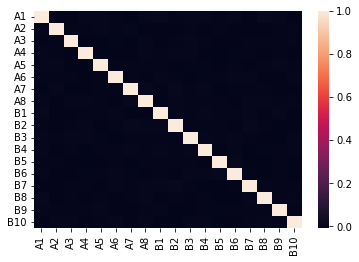

In [21]:
sample_iter = 1000
df_uniform_spearman = np.zeros((18,18))
for i in range(sample_iter):
    # low inclusive, high exclusive
    arr_uniform = rng.integers(low=1, high=7, size=df_clean_rank.shape)
# arr_uniform //= sample_iter
    df_uniform = pd.DataFrame(arr_uniform, columns=df_clean_rank.columns, index=df_clean_rank.index)
# df_uniform_norm = normalize_ranked_ratings(df_uniform)
    df_uniform_spearman += df_uniform.corr(method='spearman')
df_uniform_spearman /= sample_iter
print('Absolute worst we could do')
print('Average Spearman Correlation:', spearman_avg(df_uniform_spearman))
sns.heatmap(df_uniform_spearman)
plt.show()

# Top Baseline

Average Spearman Correlation of All Raters: 0.5510014773656644
Best we can hope for
Average Spearman Correlation for Best Rater 0.6446799015621208


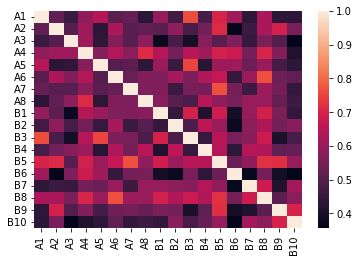

In [22]:
df_clean_rank_spearman = df_uniform.corr(method='spearman')
# df_clean_rank_spearman
# print(df_clean_rank.to_string())
df_raw_raters.index = df_raw_raters['File']
df_raw_ratings = df_raw_raters.drop(columns=['File', 'Word Key', 'Row Sum', 'Target Tone', 'A9', 'A10'])
df_raw_ratings_spearman = df_raw_ratings.corr(method='spearman')
print('Average Spearman Correlation of All Raters:', spearman_avg(df_raw_ratings_spearman))
best_rater = df_raw_ratings_spearman.sum(axis=0).idxmax()
best_avg_spearman = df_raw_ratings_spearman[best_rater].drop(labels=[best_rater]).mean()
print('Best we can hope for')
print('Average Spearman Correlation for Best Rater', best_avg_spearman)
# sns.heatmap(df_raw_ratings_spearman)
sns.heatmap(df_raw_ratings_spearman)
plt.show()

# Best Rater vs. Machine

In [23]:
# best_rater_ml = merge_ML_ratings()
df_ml = pd.read_csv(ML_RATING)
df_ml.index = df_ml['File']
df_ml.drop(columns=['word key', 'File', 'Rating\nFeedback', 'ML Rating', 'Comments'], inplace=True)
df_ml_best = merge_ML_ratings(df_ml, df_raw_ratings[best_rater], best_rater)
# diffs = []
preds = []
for index, row in df_ml_human.iterrows():
    tone = row['Target Tone']
    # obs - predicted
    # diff = row['Human'] - row[f'Tone{int(tone)}']
    # diffs.append(diff)
    preds.append(row[f'Tone{int(tone)}'])
df_ml_best['Prediction'] = preds
ml_best_spearman = df_ml_best[[best_rater, 'Prediction']].corr(method='spearman')
display(ml_best_spearman)

,B5,Prediction
B5,1.000000,0.415037
Prediction,0.415037,1.000000


# Plots

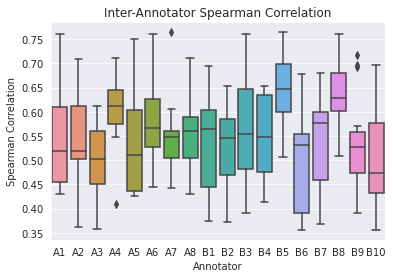

In [133]:
# copy to fill diagonal
df_raw_spearman_copy = df_raw_ratings_spearman.copy()
np.fill_diagonal(df_raw_spearman_copy.values, np.nan)
# df_raw_spearman_copy
# sns.boxplot(data=df_raw_ratings_spearman)
boxplot = sns.boxplot(data=df_raw_spearman_copy)
boxplot.set_title('Inter-Annotator Spearman Correlation')
boxplot.set_xlabel('Annotator')
boxplot.set_ylabel('Spearman Correlation')
plt.savefig('boxplot.png', dpi=300)
# df_raw_spearman_copy.boxplot(title='Rater Spearman Correlation')

Text(0, 0.5, 'Spearman Correlation')

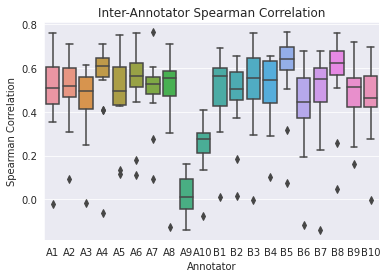

In [130]:
df_raw_ratings_all = df_raw_raters.drop(columns=['File', 'Word Key', 'Row Sum', 'Target Tone'])
df_raw_ratings_all_spearman = df_raw_ratings_all.corr(method='spearman')
np.fill_diagonal(df_raw_ratings_all_spearman.values, np.nan)
boxplot_all = sns.boxplot(data=df_raw_ratings_all_spearman)
boxplot_all.set_title('Inter-Annotator Spearman Correlation')
boxplot_all.set_xlabel('Annotator')
boxplot_all.set_ylabel('Spearman Correlation')


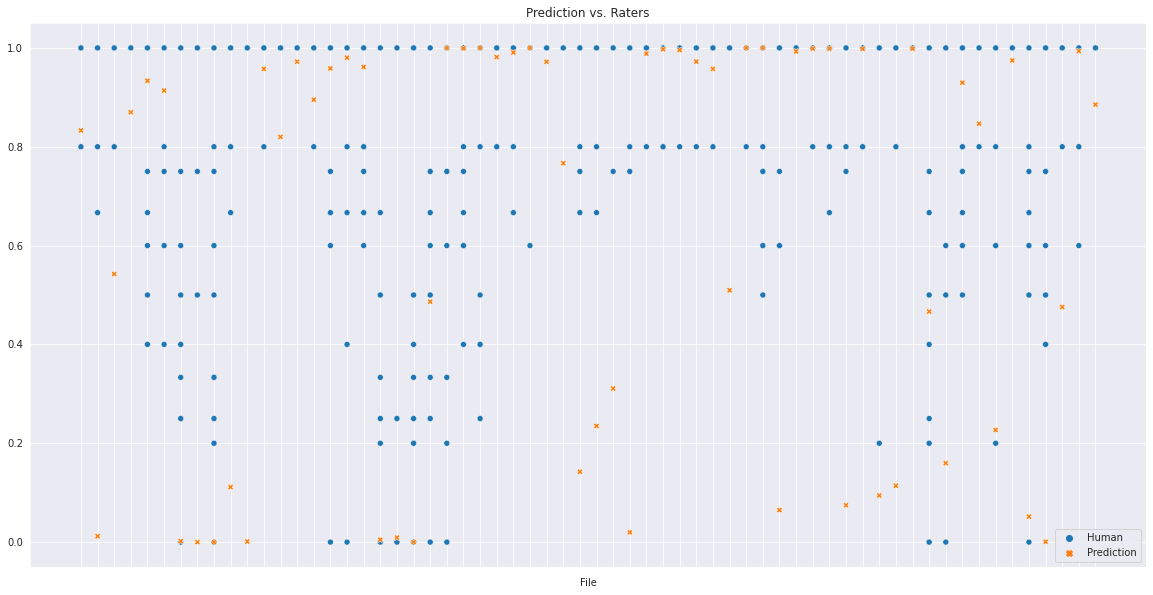

In [25]:
# Human vs. Machine
RATER_OUTLIERS = ['A9', 'A10']

fig = plt.gcf()
fig.set_size_inches( 20, 10)
df_all_human_ml = merge_ML_ratings(df_norm, df_ml_human['Prediction'], 'Prediction')
dict_rename = {}
for item in rater_ids_A + rater_ids_B:
    if item not in RATER_OUTLIERS:
        dict_rename[item] = 'Human'
df_all_plot = df_all_human_ml.rename(columns=dict_rename)
df_all_plot.drop(columns=RATER_OUTLIERS, inplace=True)
df_norm_plot = df_norm.drop(columns=RATER_OUTLIERS)
sns.set_style("darkgrid")
ax = sns.scatterplot(data=df_all_plot)
ax.set(xticklabels=[])
ax.set(title='Prediction vs. Raters')
plt.show()

# Dumb Baseline

In [26]:
def rater_std_from_mean(df_mean, df_rater):
    merged = merge_ML_ratings(df_mean, df_rater.rank(), 'mean')
    return merged.std(axis=1)
    

In [37]:
# if the rater just assigned 6 to everything lol
dumb_rater = pd.DataFrame(6, index=df_ml.index, columns=['Dummy'])
df_dumb = merge_ML_ratings(df_raw_ratings, dumb_rater, 'Dummy')
# df_dumb.corr(method='spearman') # cant calculate bc dummy is constant, no standard deviation
# # convert to ranks within speaker
# dumb_rater_ranks = df_dumb.rank()
# print('Dummy Std')
# # dumb_rater_ranks.std(axis=1)
df_rater_ranks = df_raw_ratings.rank()
# # df_rater_ranks
df_ranks_mean = df_raw_ratings.rank().mean(axis=1).to_frame()
# df_raw_ratings.rank()

In [38]:
# df_mean_dumb = merge_ML_ratings(df_ranks_mean, dumb_rater.rank(), 'mean')
# print('Avg Std of dummy from mean')
# df_mean_dumb.std(axis=1).mean()

In [39]:
print('Actual Avg Std from mean')
df_raw_ratings_ranks = df_raw_ratings.rank()
df_raw_ratings_ranks.std(axis=1).mean()

Actual Avg Std from mean


8.86012456629845

In [40]:
print('Avg Std of best rater from mean')
rater_std_from_mean(df_ranks_mean, df_rater_ranks['B5']).mean()

Avg Std of best rater from mean


2.884546710554646

In [41]:
df_rater_ranks['B5']
# dumb_rater

File
ba1_MV3              41.0
bao3_FV3             41.0
bing1_MV1            41.0
fa1_FV3              41.0
fa2_FV1              41.0
                     ... 
wu3_LV4_ex10_R1      41.0
ya1_HV3_ex12_R3       4.5
ya1_LV3_ex12_R2      10.0
yang4_LV4_ex19_R2    41.0
yang4_LV5_ex19_R7    41.0
Name: B5, Length: 70, dtype: float64

# MSE Baselines

In [42]:
# MAE
def normalize_rater(df):
    dict_norm = {'File': df.iloc[:, 0]}
    for col in df.iloc[: , 1:]:
        col_min = min(df[col])
        col_max = max(df[col])
        norm = []
        for item in df[col]:
            val = (item - col_min) / (col_max - col_min)
            norm.append(val)
        dict_norm[col] = norm
    return pd.DataFrame(dict_norm, columns=df.columns, index=df.index)

print('Mean Human vs. Prediction MSE:', mean_squared_error(df_ml_human['Human'], df_ml_human['Prediction']))
df_best_ml = merge_ML_ratings(df_ml_human['Prediction'], df_norm['B5'], 'ML')
print('Best Rater vs. Prediction MSE:', mean_squared_error(df_best_ml['B5'], df_best_ml['Prediction']))

df_best_human = merge_ML_ratings(df_ml_human['Human'], df_norm['B5'], 'Human')
print('Mean Human vs. Best Rater MSE', mean_squared_error(df_best_human['Human'], df_best_human['B5']))

# constant rater - does it make sense to do this though? because our data is so skewed anyway.
mean_rating = df_norm.mean().mean()
constant_rater = pd.DataFrame(mean_rating, index=df_ml_human.index, columns=['Constant'])
print('Mean Human vs. Constant', mean_squared_error(df_ml_human['Human'], constant_rater))


Mean Human vs. Prediction MSE: 0.19350203774438854
Best Rater vs. Prediction MSE: 0.21448132377355475
Mean Human vs. Best Rater MSE 0.030466677867383506
Mean Human vs. Constant 0.03825065098566308


In [43]:
uniform_rater = np.zeros(df_norm.shape[0])
num_iter = 1000
for i in range(num_iter):
    uniform_rater += rng.integers(low=1, high=7, size=df_norm.shape[0])
uniform_rater = pd.DataFrame(uniform_rater / num_iter, index=df_norm.index, columns=['Uniform'])
rater_max = uniform_rater.max()[0]
rater_min = uniform_rater.min()[0]
# uniform_rater
uniform_rater = uniform_rater.apply(np.vectorize(lambda x: (x - rater_min) / (rater_max - rater_min)))
# df_uniform_normalized = normalize_rater(uniform_rater)
# df_uniform_norm_mean = df_uniform_normalized.mean(axis=1).to_frame()
# df_uniform_norm_mean.rename(columns={'Row Labels':'File'}, inplace=True)
# df_uniform_normalized.index.names = ['File']
# df_uniform_normalized.rename(columns={0:'Uniform'}, inplace=True)
df_uniform_human = merge_ML_ratings(uniform_rater, df_ml_human['Human'], 'Uniform')
print('Humans vs. Uniform MSE:', mean_squared_error(df_uniform_human['Human'], df_uniform_human['Uniform']))
# # print(uniform_rater.to_string())

Humans vs. Uniform MSE: 0.23374735012405776


In [44]:
# uniform_rater = np.zeros(df_norm.shape[0])
avg_mse = 0
num_iter = 1000
for i in range(num_iter):
    uniform_rater = rng.integers(low=1, high=7, size=df_norm.shape[0])
    uniform_rater = pd.DataFrame(uniform_rater, index=df_norm.index, columns=['Uniform'])
    rater_max = uniform_rater.max()[0]
    rater_min = uniform_rater.min()[0]
# uniform_rater
    uniform_rater = uniform_rater.apply(np.vectorize(lambda x: (x - rater_min) / (rater_max - rater_min)))
# df_uniform_normalized = normalize_rater(uniform_rater)
# df_uniform_norm_mean = df_uniform_normalized.mean(axis=1).to_frame()
# df_uniform_norm_mean.rename(columns={'Row Labels':'File'}, inplace=True)
# df_uniform_normalized.index.names = ['File'] 
# df_uniform_normalized.rename(columns={0:'Uniform'}, inplace=True)
    df_uniform_human = merge_ML_ratings(uniform_rater, df_ml_human['Human'], 'Uniform')
    avg_mse += mean_squared_error(df_uniform_human['Human'], df_uniform_human['Uniform'])
avg_mse /= num_iter
print('Humans vs. Uniform MSE (avg):', avg_mse)
# print(uniform_rater.to_string())

Humans vs. Uniform MSE (avg): 0.2794039198028672


In [51]:
df_best_test = merge_ML_ratings(df_ml_human['Human'], df_norm['B10'], 'Human')
print('Mean Human vs. Some MSE', mean_squared_error(df_best_test['Human'], df_best_test['B10']))


Mean Human vs. Some MSE 0.03724087141577061


In [104]:
df_user_record = df_raw_ratings.iloc[20:]
df_user_record_spear = df_user_record.corr(method='spearman')
df_user_record_spear.mean().mean()
# df_record_mean = df_user_record.mean()
df_user_norm = normalize_ranked_ratings(df_user_record)
df_users_machine = merge_ML_ratings(df_user_norm.mean(axis=1).to_frame(), df_ml_human['Prediction'], 'User')
mean_squared_error(df_users_machine['User'], df_users_machine['Prediction'])

0.24117717011216772

In [108]:
mean_user_rating = df_user_norm.mean().mean()
constant_user = pd.DataFrame(mean_user_rating, index=df_users_machine.index, columns=['Constant'])
print('Mean Human vs. Constant User', mean_squared_error(df_users_machine['User'], constant_user))

Mean Human vs. Constant User 0.05054724375538329


In [121]:
df_uniform.index.names = ['File']
df_avg_uni_human = merge_ML_ratings(normalize_ranked_ratings(df_uniform).mean(axis=1).to_frame(), df_ml_human['Human'], 'Uniform')
mean_squared_error(df_avg_uni_human['Human'], df_avg_uni_human['Uniform'])

0.17100132541816013

In [122]:
df_avg_uni_human.corr(method='spearman')

,Uniform,Human
Uniform,1.000000,0.127632
Human,0.127632,1.000000


In [127]:
df_ml_human[['Human', 'Prediction']].corr(method='spearman')

,Human,Prediction
Human,1.000000,0.278392
Prediction,0.278392,1.000000
